In [1]:
import pandas as pd
import numpy as np

In [2]:
client=pd.read_csv("/Users/jaszeng/Desktop/Metis/Classification/application_train.csv")
client_bureau=pd.read_csv("/Users/jaszeng/Desktop/Metis/Classification/bureau.csv")

In [3]:
client_bureau=client_bureau[['SK_ID_CURR','AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT']].groupby('SK_ID_CURR').agg(['sum'])
client_bureau.columns = client_bureau.columns.droplevel(1)
client_bureau.head()

,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT
SK_ID_CURR,,
100001,1453365.000,596686.5
100002,865055.565,245781.0
100003,1017400.500,0.0
100004,189037.800,0.0
100005,657126.000,568408.5


In [4]:
client_df=pd.merge(client,client_bureau,left_on="SK_ID_CURR",right_index=True,how="left")

In [5]:
client_df.shape

(307511, 124)

In [6]:
client_df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT
296355,443342,0,Cash loans,F,N,Y,0,270000.0,1459584.0,61969.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1682833.50,626800.5
251529,391036,0,Revolving loans,M,N,Y,0,96750.0,270000.0,13500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,2477943.00,472306.5
145774,269023,0,Cash loans,M,N,Y,0,103500.0,253377.0,9909.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2181802.50,1156725.0
71065,182422,0,Cash loans,M,Y,Y,0,225000.0,519633.0,41184.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,954344.79,0.0
103448,220072,1,Cash loans,F,N,N,0,90000.0,284400.0,13387.5,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,5738854.50,2107863.0


In [7]:
client_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT'],
      dtype='object', length=124)

In [8]:
client_df.shape

(307511, 124)

In [9]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 124 entries, SK_ID_CURR to AMT_CREDIT_SUM_DEBT
dtypes: float64(67), int64(41), object(16)
memory usage: 290.9+ MB


First, delete columns with too many null values, I have 300,000 data, let's set the threshold to be 50,000 first. If null value of a feature exceeds 50,000, we delete this feature.

In [10]:
col_countna=client_df.isna().sum().sort_values(ascending=False)
nullcolumns=col_countna[col_countna>50000].index
client_df1=client_df.drop(columns=nullcolumns)
client_df1.shape

(307511, 73)

Next, We should replace float NA with mean, int NA and object NA with mode

In [11]:
object_columns=[]
float_columns=[]
int_columns=[]
for i in client_df1.columns:
    if client_df1[i].dtypes=='object':
        object_columns.append(i)
    elif client_df1[i].dtypes=='float':
        float_columns.append(i)
    else:
        int_columns.append(i)

In [12]:
len(int_columns)

41

In [13]:
client_df1[float_columns]=client_df1[float_columns].fillna(client_df1[float_columns].mean())
client_df1[int_columns]=client_df1[int_columns].fillna(client_df1[int_columns].mode())
client_df1[object_columns]=client_df1[object_columns].fillna(client_df1[object_columns].mode())

In [14]:
client_df1.isna().sum().sort_values(ascending=False)

NAME_TYPE_SUITE        1292
SK_ID_CURR                0
FLAG_DOCUMENT_4           0
FLAG_DOCUMENT_10          0
FLAG_DOCUMENT_9           0
                       ... 
FLAG_CONT_MOBILE          0
FLAG_WORK_PHONE           0
FLAG_EMP_PHONE            0
FLAG_MOBIL                0
AMT_CREDIT_SUM_DEBT       0
Length: 73, dtype: int64

In [15]:
client_df1['NAME_TYPE_SUITE']=client_df1['NAME_TYPE_SUITE'].fillna('Unaccompanied')

Then, deal with categorical value

In [16]:
client_df1.loc[:,object_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             307511 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 10  ORGANIZATION_TYPE           307511 non-null  object
dtypes: object(11)
memory usage: 25.8+ MB


In [17]:
client_df1.loc[:,object_columns].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

Here I delete the 'organization type' feature since this feature is too complicated, and it will not add value to model as the time it will consume. Also I delete 'weekday_appr_process_start' as this should not impact the model. Then, for categorical object columns that only have two groups, I change it to 0/1 dummy columns.

In [18]:
client_df1['FLAG_CASH_LOANS']=(client_df1['NAME_CONTRACT_TYPE']=='Cash loans') .astype(int)
client_df1['FLAG_OWN_CAR']=(client_df1['FLAG_OWN_CAR']=='Y') .astype(int)
client_df1['FLAG_OWN_REALTY']=(client_df1['FLAG_OWN_REALTY']=='Y') .astype(int)

Next, change gender into dummies

In [19]:
client_df1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [20]:
client_df1=client_df1[client_df1['CODE_GENDER']!='XNA']
client_df1['GENDER']=(client_df1['CODE_GENDER']=='F') .astype(int)

In [21]:
client_df1=client_df1.drop(columns=['CODE_GENDER','NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'])

Look at NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE, see if average default rate is largely different by categories

<AxesSubplot:xlabel='NAME_TYPE_SUITE'>

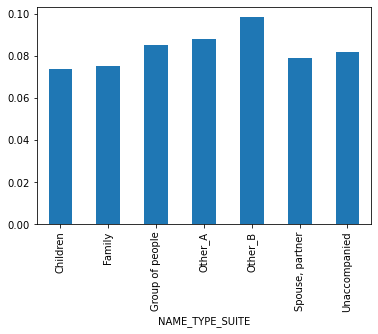

In [22]:
client_df1.groupby('NAME_TYPE_SUITE')['TARGET'].mean().plot(kind='bar')

<AxesSubplot:xlabel='NAME_INCOME_TYPE'>

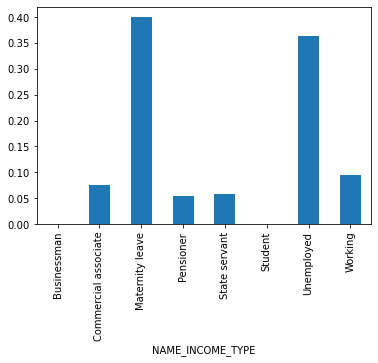

In [23]:
client_df1.groupby('NAME_INCOME_TYPE')['TARGET'].mean().plot(kind='bar')

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE'>

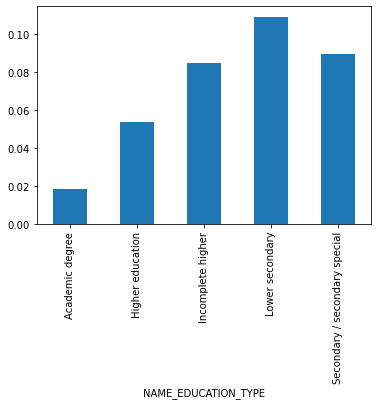

In [24]:
client_df1.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().plot(kind='bar')

<AxesSubplot:xlabel='NAME_FAMILY_STATUS'>

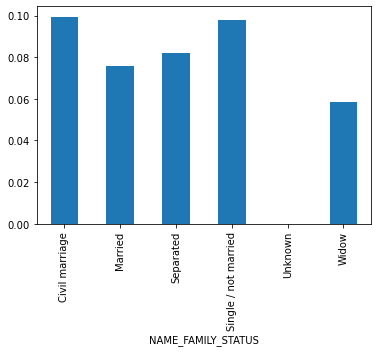

In [25]:
client_df1.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().plot(kind='bar')

<AxesSubplot:xlabel='NAME_HOUSING_TYPE'>

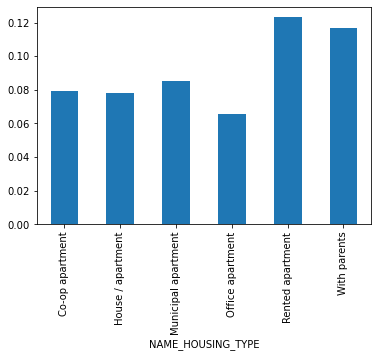

In [26]:
client_df1.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().plot(kind='bar')

## Observation: 

'NAME_TYPE_SUITE' doesn't seem to be an important feature

'NAME_INCOME_TYPE' = maternity leave or unemployed, looks to have obvious higher default rate

'NAME_EDUCATION_TYPE' default rate raised along group: 'academic degree' -> 'higher education' -> 'incomplete higher' -> 'secondary special' -> 'lower secondary'

'NAME_FAMILY_STATUS'='widow' seems to have lower default rate

'NAME_HOUSING_TYPE'= 'rented apartment' and 'with parents' seem to have higher default rate

In [27]:
client_df1['NAME_INCOME_TYPE'].loc[(client_df1['NAME_INCOME_TYPE']!='Maternity leave')&(client_df1['NAME_INCOME_TYPE']!='Unemployed')] = 'Others income type'
client_df1=pd.concat([client_df1,pd.get_dummies(client_df1['NAME_INCOME_TYPE'],drop_first=True)],axis=1)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
client_df1['NAME_EDUCATION_TYPE'].loc[client_df1['NAME_EDUCATION_TYPE']=='Lower secondary'] = 1
client_df1['NAME_EDUCATION_TYPE'].loc[client_df1['NAME_EDUCATION_TYPE']=='Secondary / secondary special'] = 2
client_df1['NAME_EDUCATION_TYPE'].loc[client_df1['NAME_EDUCATION_TYPE']=='Incomplete higher'] = 3
client_df1['NAME_EDUCATION_TYPE'].loc[client_df1['NAME_EDUCATION_TYPE']=='Higher education'] = 4
client_df1['NAME_EDUCATION_TYPE'].loc[client_df1['NAME_EDUCATION_TYPE']=='Academic degree'] = 5
client_df1['NAME_EDUCATION_TYPE']=client_df1['NAME_EDUCATION_TYPE'].astype('int')

In [29]:
client_df1['FLAG_WIDOW']=(client_df1['NAME_FAMILY_STATUS']=='Widow').astype('int')

In [30]:
client_df1['NAME_HOUSING_TYPE'].loc[(client_df1['NAME_HOUSING_TYPE']!='Rented apartment')&(client_df1['NAME_HOUSING_TYPE']!='With parents')] = 'Others housing type'
client_df1=pd.concat([client_df1,pd.get_dummies(client_df1['NAME_HOUSING_TYPE'],drop_first=True)],axis=1)

In [31]:
client_df2=client_df1.drop(columns=['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])

In [32]:
client_df2['Others income type']=client_df2['Others income type'].astype('int')
client_df2['Unemployed']=client_df2['Unemployed'].astype('int')
client_df2['Rented apartment']=client_df2['Rented apartment'].astype('int')
client_df2['With parents']=client_df2['With parents'].astype('int')

In [33]:
client_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   FLAG_OWN_CAR                 307507 non-null  int64  
 3   FLAG_OWN_REALTY              307507 non-null  int64  
 4   CNT_CHILDREN                 307507 non-null  int64  
 5   AMT_INCOME_TOTAL             307507 non-null  float64
 6   AMT_CREDIT                   307507 non-null  float64
 7   AMT_ANNUITY                  307507 non-null  float64
 8   AMT_GOODS_PRICE              307507 non-null  float64
 9   NAME_EDUCATION_TYPE          307507 non-null  int64  
 10  REGION_POPULATION_RELATIVE   307507 non-null  float64
 11  DAYS_BIRTH                   307507 non-null  int64  
 12  DAYS_EMPLOYED                307507 non-null  int64  
 13 

## change days into year

In [34]:
client_df2['AGE']=client_df2['DAYS_BIRTH']/(-365)
client_df2['YEAR_LAST_PHONE_CHANGE']=client_df2['DAYS_LAST_PHONE_CHANGE']/(-365)
client_df2['YEAR_ID_PUBLISH']=client_df2['DAYS_ID_PUBLISH']/(-365)
client_df2['YEAR_REGISTRATION']=client_df2['DAYS_REGISTRATION']/(-365)
client_df2['YEAR_EMPLOYED']=client_df2['DAYS_EMPLOYED']/(-365)
client_df2=client_df2.drop(columns=['DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_EMPLOYED'])

## Feature Engineering

In [35]:
import matplotlib.pyplot as plt

(array([ 6.70853217, 17.93039619, 43.46901895, 32.61594859, 40.69428575,
        11.08677477, 15.17322459, 56.36869146, 28.92936295, 14.5220944 ,
        40.46463403, 15.07190765, 31.72435953,  8.96452265, 22.1627424 ,
         0.        ,  0.        ,  0.        ,  0.        , 18.15869702,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 11.36370773]),
 array([0.00029   , 0.00269727, 0.00510453, 0.0075118 , 0.00991907,
        0.01232633, 0.0147336 , 0.01714087, 0.01954813, 0.0219554 ,
        0.02436267, 0.02676993, 0.0291772 , 0.03158447, 0.03399173,
        0.036399  , 0.03880627, 0.04121353, 0.0436208 , 0.04602807,
        0.04843533, 0.0508426 , 0.05324987, 0.05565713, 0.0580644 ,
        0.06047167, 0.06287893, 0.0652862 , 0.06769347, 0.07010073,
        0.072508  ]),
 <BarContainer object of 30 artists>)

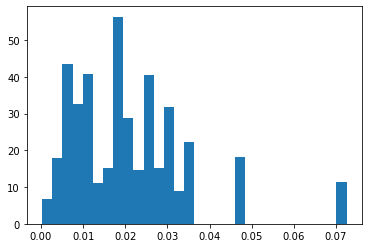

In [36]:
plt.hist(client_df2['REGION_POPULATION_RELATIVE'], density=True, bins=30)

In [37]:
max(client_df2['REGION_POPULATION_RELATIVE'])

0.072508

In [38]:
client_df2['REGION_POPULATION_RELATIVE'].loc[client_df2['REGION_POPULATION_RELATIVE']>0.05] = 3
client_df2['REGION_POPULATION_RELATIVE'].loc[(client_df2['REGION_POPULATION_RELATIVE']<=0.05)&(client_df2['REGION_POPULATION_RELATIVE']>0.025)] = 2
client_df2['REGION_POPULATION_RELATIVE'].loc[client_df2['REGION_POPULATION_RELATIVE']<=0.025] = 1

In [39]:
client_df2['REGION_POPULATION_RELATIVE'].value_counts()

1.0    204420
2.0     94675
3.0      8412
Name: REGION_POPULATION_RELATIVE, dtype: int64

<AxesSubplot:xlabel='REGION_POPULATION_RELATIVE'>

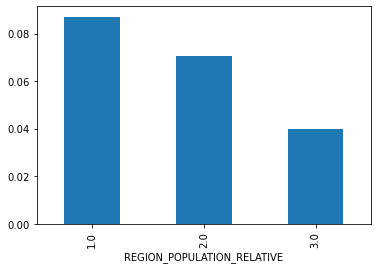

In [40]:
client_df2.groupby('REGION_POPULATION_RELATIVE')['TARGET'].mean().plot(kind='bar')

In [41]:
client_df2['AMT_CREDIT_SUM'].loc[client_df2['AMT_CREDIT_SUM']==0] = 1
client_df2['DEBT_CREDIT_R']=client_df2['AMT_CREDIT_SUM_DEBT']/client_df2['AMT_CREDIT_SUM']
client_df2['CREDIT_ANNUITY_R']=client_df2['AMT_CREDIT']/client_df2['AMT_ANNUITY']

In [42]:
client_df2['DEBT_CREDIT_R'].sort_values()

75108    -3112461.135
296055     -25959.645
123864      -8090.685
48658       -7549.830
289760      -7039.530
             ...     
92248       54587.835
240312      79141.500
92926      104654.520
99268      227419.695
274659    2250000.000
Name: DEBT_CREDIT_R, Length: 307507, dtype: float64

In [43]:
client_df2.to_csv('/Users/jaszeng/Desktop/Metis/Classification/client_df2.csv',index=False)

In [44]:
import pandas as pd
client_df2=pd.read_csv("/Users/jaszeng/Desktop/Metis/Classification/client_df2.csv")
client_df2.sample(5)

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,FLAG_WIDOW,Rented apartment,With parents,AGE,YEAR_LAST_PHONE_CHANGE,YEAR_ID_PUBLISH,YEAR_REGISTRATION,YEAR_EMPLOYED,DEBT_CREDIT_R,CREDIT_ANNUITY_R
307317,456045,0,0,1,1,112500.0,808650.0,23643.0,675000.0,4,...,0,0,0,37.668493,0.232877,16.375342,8.482192,1.167123,0.742630,34.202512
263207,404772,0,0,1,0,157500.0,136512.0,10912.5,108000.0,1,...,0,0,0,57.991781,4.030137,8.912329,6.668493,9.095890,0.000000,12.509691
35586,141214,0,0,0,0,207000.0,1078200.0,31653.0,900000.0,4,...,0,0,1,24.909589,1.156164,4.627397,9.975342,2.890411,0.681285,34.063122
261084,402171,1,0,0,0,90000.0,808650.0,26217.0,675000.0,2,...,0,0,0,37.032877,1.978082,1.002740,20.849315,2.221918,0.327563,30.844490
57148,166239,0,0,1,0,90000.0,450000.0,25965.0,450000.0,2,...,0,0,0,24.821918,2.800000,2.254795,10.353425,3.109589,0.684836,17.331023


In [45]:
client_df2.shape

(307507, 74)

Split data into train and test data and build a baseline model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [47]:
X=client_df2.drop(columns=['TARGET'])
Y=client_df2['TARGET']

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=222)

# Do 500 neighborhood feature engineering here

In [49]:
X_train_neibs=X_train[["EXT_SOURCE_2","CREDIT_ANNUITY_R"]]
X_test_neibs=X_test[["EXT_SOURCE_2","CREDIT_ANNUITY_R"]]

In [50]:
X_train_neibs.head()

,EXT_SOURCE_2,CREDIT_ANNUITY_R
190997,0.689818,34.201101
155532,0.055359,25.112662
4028,0.323341,15.359566
253824,0.404133,9.528620
22348,0.700030,20.787811


In [51]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=500)
neigh.fit(X_train_neibs, Y_train)

KNeighborsRegressor(n_neighbors=500)

In [52]:
X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)

/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2930280484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2930280484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)


Baseline model: Logistic Regression

In [53]:
logit=LogisticRegression(max_iter=100000)
logit.fit(X_train,Y_train)
logit_pred=logit.predict(X_test)

In [54]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

In [55]:
import numpy as np
print("accuracy: ",accuracy(Y_test, logit_pred))
print("precision: ",precision(Y_test, logit_pred))
print("recall: ",recall(Y_test, logit_pred))
print("F1: ", F1(Y_test,logit_pred))

accuracy:  0.9178563298754512
precision:  0.0
recall:  0.0
F1:  nan


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/3466243424.py:16: RuntimeWarning: invalid value encountered in double_scalars
  return 2*p*r / (p + r)


In [56]:
logit_pred[logit_pred==1]

array([1, 1, 1, 1])

In [57]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(random_state=42)
rforest.fit(X_train,Y_train)
rforest_pred=rforest.predict(X_test)

In [58]:
print("accuracy: ",accuracy(Y_test, rforest_pred))
print("precision: ",precision(Y_test, rforest_pred))
print("recall: ",recall(Y_test, rforest_pred))
print("F1: ", F1(Y_test,rforest_pred))

accuracy:  0.9180189262137817
precision:  0.575
recall:  0.0045562599049128365
F1:  0.009040880503144654


In [59]:
rforest_pred[rforest_pred==1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Since all model returns prediction of zero, I guess this is the result of destructive imbalance. I would first try to down-sample my train data set. keep 15,000 default clients and 15,000 good clients and retrain the model.

# Random Forest Baseline model to see feature importance

In [60]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(random_state=42,class_weight={1:10,0:1})
rforest.fit(X_train, Y_train)
rforest_pred=rforest.predict(X_test)
rforest_fit=rforest.predict(X_train)

In [61]:
from sklearn.metrics import confusion_matrix
print("random forest confusion matrix - In Sample: \n \n", confusion_matrix(Y_train,rforest_fit))

random forest confusion matrix - In Sample: 
 
 [[226228      0]
 [    10  19767]]


In [62]:
print("random forest confusion matrix - Out of Sample: \n \n", confusion_matrix(Y_test,rforest_pred))

random forest confusion matrix - Out of Sample: 
 
 [[56436    18]
 [ 5026    22]]


In [63]:
import numpy as np

In [64]:
print("accuracy: ",accuracy(Y_test, rforest_pred))
print("precision: ",precision(Y_test, rforest_pred))
print("recall: ",recall(Y_test, rforest_pred))
print("F1: ", F1(Y_test,rforest_pred))

accuracy:  0.9179864069461156
precision:  0.55
recall:  0.004358161648177496
F1:  0.008647798742138365


In [65]:
importances = rforest.feature_importances_
feature_names=X_train.columns
forest_importances = pd.Series(importances, index=feature_names)
forest_importances=forest_importances.sort_values(ascending=False)

In [66]:
forest_importances[0:20]

neighbors_target_mean_500     0.122611
EXT_SOURCE_2                  0.069473
AGE                           0.049181
YEAR_ID_PUBLISH               0.045124
YEAR_REGISTRATION             0.044614
CREDIT_ANNUITY_R              0.043533
SK_ID_CURR                    0.043471
YEAR_EMPLOYED                 0.043364
YEAR_LAST_PHONE_CHANGE        0.042743
AMT_ANNUITY                   0.040996
DEBT_CREDIT_R                 0.039474
AMT_CREDIT_SUM                0.038505
AMT_CREDIT                    0.037485
AMT_CREDIT_SUM_DEBT           0.033256
AMT_INCOME_TOTAL              0.033140
AMT_GOODS_PRICE               0.032845
HOUR_APPR_PROCESS_START       0.028714
AMT_REQ_CREDIT_BUREAU_YEAR    0.019513
OBS_30_CNT_SOCIAL_CIRCLE      0.015281
OBS_60_CNT_SOCIAL_CIRCLE      0.015167
dtype: float64

In [67]:
ini_features_nms=['neighbors_target_mean_500','EXT_SOURCE_2','AGE','YEAR_ID_PUBLISH',
                  'YEAR_REGISTRATION','CREDIT_ANNUITY_R','YEAR_EMPLOYED','YEAR_LAST_PHONE_CHANGE',
                  'AMT_ANNUITY','DEBT_CREDIT_R','AMT_CREDIT_SUM','HOUR_APPR_PROCESS_START',
                  'OBS_30_CNT_SOCIAL_CIRCLE','REGION_POPULATION_RELATIVE']
forest_importances=forest_importances[ini_features_nms]

In [68]:
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)
feature_std = pd.Series(std, index=feature_names)
STD=feature_std[forest_importances.index]

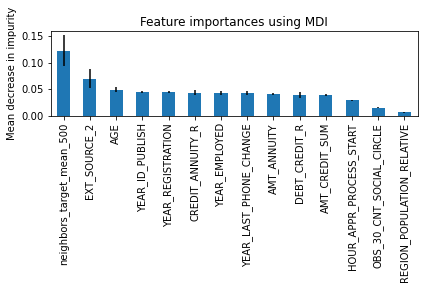

In [69]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=STD, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [70]:
X_train2=X_train[ini_features_nms]
X_test2=X_test[ini_features_nms]

In [71]:
rforest = RandomForestClassifier(random_state=42,class_weight={1:10,0:1})

In [72]:
from sklearn.metrics import roc_auc_score, roc_curve

In [73]:
def model_performance (mdl,X_train,Y_train,X_test,Y_test):
    mdl.fit(X_train, Y_train)
    mdl_fit=mdl.predict(X_train)
    mdl_fitpro=mdl.predict_proba(X_train)
    mdl_pred=mdl.predict(X_test)
    mdl_predpro=mdl.predict_proba(X_test)
    print("In Sample confusion matrix: \n \n", confusion_matrix(Y_train,mdl_fit),"\n \n")
    print("Out of Sample confusion matrix: \n \n", confusion_matrix(Y_test,mdl_pred),"\n \n")
    print("In Sample ROC AUC score: ", roc_auc_score(Y_train,mdl_fitpro[:,1]),"\n \n")
    print("Out of Sample ROC AUC score: ", roc_auc_score(Y_test,mdl_predpro[:,1]),"\n \n")
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, mdl_predpro[:,1])
    plt.subplots(1, figsize=(10,10))
    plt.title('ROC Curve')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In Sample confusion matrix: 
 
 [[226228      0]
 [     9  19768]] 
 

Out of Sample confusion matrix: 
 
 [[56419    35]
 [ 5013    35]] 
 

In Sample ROC AUC score:  1.0 
 

Out of Sample ROC AUC score:  0.7112963557079164 
 



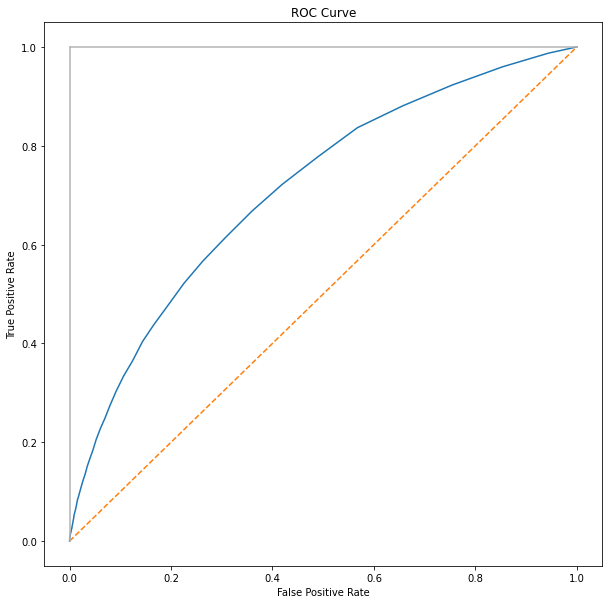

In [74]:
model_performance(rforest,X_train2,Y_train,X_test2,Y_test)

In [75]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(scale_pos_weight=90)

In [76]:
#from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
#AdaBst=AdaBoostClassifier(random_state=42,class_weight={1:10,0:1})

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
In Sample confusion matrix: 
 
 [[ 46008 180220]
 [     3  19774]] 
 

Out of Sample confusion matrix: 
 
 [[10933 45521]
 [  321  4727]] 
 

In Sample ROC AUC score:  0.8160600852760753 
 

Out of Sample ROC AUC score:  0.7072345992869558 
 



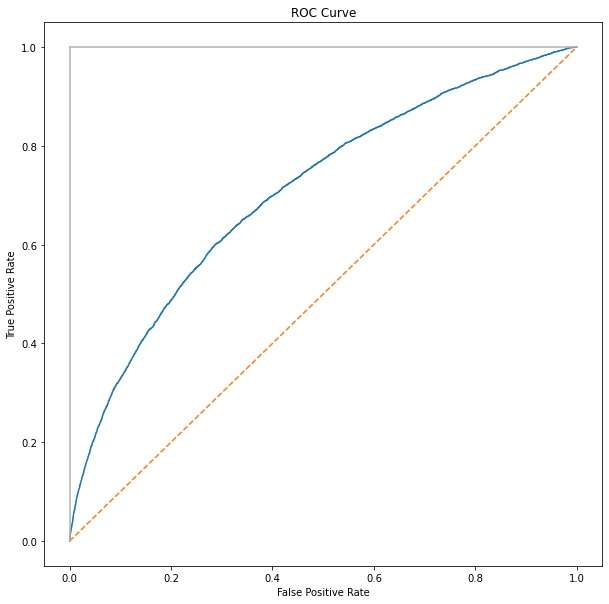

In [77]:
model_performance(xgboost,X_train2,Y_train,X_test2,Y_test)

setting up cross validation using roc-auc metrics

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [80]:
model_dict1={}
model_dict1['Logistic Regression']=LogisticRegression(max_iter=100000,class_weight={1:10,0:1})
model_dict1['Random Forest']=RandomForestClassifier(random_state=42,class_weight={1:10,0:1})
#model_dict1['Ada Boost']=AdaBoostClassifier(random_state=42)
model_dict1['Gradient Boost']=XGBClassifier(random_state=42,scale_pos_weight=90)
model_list=[('lr',model_dict1['Logistic Regression']),('rf',model_dict1['Random Forest']),('gb',model_dict1['Gradient Boost'])]
model_dict1['Voting Classifier']=VotingClassifier(estimators=model_list,voting='soft',weights=None)

In [81]:
print(model_dict1)

{'Logistic Regression': LogisticRegression(class_weight={0: 1, 1: 10}, max_iter=100000), 'Random Forest': RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42), 'Gradient Boost': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=90, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None), 'Voting Classifier': VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight={0: 1

In [84]:
from sklearn.model_selection import KFold

In [85]:
def compare_models_withfeatureeng(model_dict,X,Y):
    for i in model_dict.keys():
        mdl=model_dict[i]
        score=[]
        kf = KFold(n_splits=3)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
            X_train_neibs=X_train[["EXT_SOURCE_2","CREDIT_ANNUITY_R"]]
            X_test_neibs=X_test[["EXT_SOURCE_2","CREDIT_ANNUITY_R"]]
            neigh = KNeighborsRegressor(n_neighbors=500)
            neigh.fit(X_train_neibs, y_train)
            X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
            X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
            mdl.fit(X_train, y_train)
            mdl_predpro=mdl.predict_proba(X_test)
            score.append(roc_auc_score(y_test,mdl_predpro[:,1]))
        mean_score= np.asarray(score).mean()
        print("score of",i,": ",mean_score)

In [86]:
compare_models_withfeatureeng(model_dict1,X_train2,Y_train)

/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Logistic Regression :  0.5439845270110184


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest :  0.7077899835301662


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is 

[00:50:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is 

[00:50:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is 

[00:50:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of Gradient Boost :  0.695809635714892


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is 

[00:51:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is 

[00:52:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is 

[00:53:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of Voting Classifier :  0.7030964592406361


In [87]:
ini_10features_nms=['neighbors_target_mean_500','EXT_SOURCE_2','AGE','YEAR_ID_PUBLISH',
                  'YEAR_REGISTRATION','CREDIT_ANNUITY_R','YEAR_EMPLOYED','YEAR_LAST_PHONE_CHANGE',
                  'AMT_ANNUITY','DEBT_CREDIT_R']

In [88]:
X_train3=X_train[ini_10features_nms]

In [89]:
compare_models_withfeatureeng(model_dict1,X_train3,Y_train)

/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Logistic Regression :  0.5729096773473518


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest :  0.7048729096056513


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is 

[01:48:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is 

[01:49:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is 

[01:49:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of Gradient Boost :  0.6956667772176005


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is 

[02:06:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is 

[02:23:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is 

[02:39:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of Voting Classifier :  0.7023999235355448


Optimize Tree depth using CV

In [ ]:
model_dict2={}
model_dict2['Random Forest3']=RandomForestClassifier(random_state=42,class_weight={1:10,0:1},max_depth=3)
model_dict2['Random Forest4']=RandomForestClassifier(random_state=42,class_weight={1:10,0:1},max_depth=4)
model_dict2['Random Forest5']=RandomForestClassifier(random_state=42,class_weight={1:10,0:1},max_depth=5)
model_dict2['Random Forest6']=RandomForestClassifier(random_state=42,class_weight={1:10,0:1},max_depth=6)
model_dict2['Random Forest7']=RandomForestClassifier(random_state=42,class_weight={1:10,0:1},max_depth=7)
model_dict2['Random Forest8']=RandomForestClassifier(random_state=42,class_weight={1:10,0:1},max_depth=8)
model_dict2['Random Forest9']=RandomForestClassifier(random_state=42,class_weight={1:10,0:1},max_depth=9)
model_dict2['Random Forest10']=RandomForestClassifier(random_state=42,class_weight={1:10,0:1},max_depth=10)

In [91]:
compare_models_withfeatureeng(model_dict2,X_train3,Y_train)

/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest3 :  0.7228208553522406


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest4 :  0.7250895165938527


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest5 :  0.727286506461859


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest6 :  0.728553994390963


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest7 :  0.7297296645817344


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest8 :  0.73030113935355


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest9 :  0.7301486092637633


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

KeyboardInterrupt: 

In [92]:
model_dict3={}
model_dict3['Random Forest0']=RandomForestClassifier(random_state=42)
model_dict3['Random Forest1']=RandomForestClassifier(random_state=42,class_weight={1:10,0:1})
model_dict3['Random Forest2']=RandomForestClassifier(random_state=42,class_weight={1:20,0:1})
model_dict3['Random Forest3']=RandomForestClassifier(random_state=42,class_weight={1:30,0:1})
model_dict3['Random Forest4']=RandomForestClassifier(random_state=42,class_weight={1:40,0:1})

In [93]:
compare_models_withfeatureeng(model_dict3,X_train3,Y_train)

/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest0 :  0.7043496281853758


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest1 :  0.7048729096056513


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest2 :  0.6987430336846341


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest3 :  0.6981447193727176


/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['neighbors_target_mean_500']=neigh.predict(X_train_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['neighbors_target_mean_500']=neigh.predict(X_test_neibs)
/var/folders/qh/f_xd4_hs7jq5186tyc9v3gdm0000gn/T/ipykernel_9245/2309985315.py:13: SettingWithCopyWarning: 
A value is trying t

score of Random Forest4 :  0.6942731583890422


## Plot final ROC curves for comparison

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:50:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:51:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


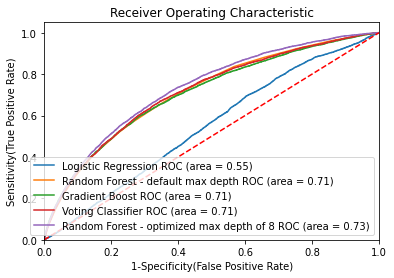

In [105]:
from sklearn import metrics
import matplotlib.pyplot as plt
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(max_iter=100000,class_weight={1:10,0:1}),
},
{
    'label': 'Random Forest - default max depth',
    'model': RandomForestClassifier(random_state=42,class_weight={1:10,0:1}),
},
{
    'label': 'Gradient Boost',
    'model': XGBClassifier(random_state=42,scale_pos_weight=90),
},
{
    'label': 'Voting Classifier',
    'model': VotingClassifier(estimators=model_list,voting='soft',weights=None),
},
{
    'label': 'Random Forest - optimized max depth of 8',
    'model': RandomForestClassifier(random_state=42,class_weight={1:10,0:1},max_depth=8),
},
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train2,Y_train) # train the model
    y_pred=model.predict(X_test2) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test2)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test,model.predict_proba(X_test2)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('/Users/jaszeng/Desktop/Metis/Classification/ROC curves.png')
plt.show()# Display

In [104]:
plt.show()

To display final feature importance

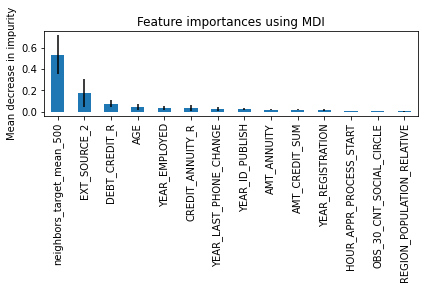

In [100]:
rforest=RandomForestClassifier(random_state=42,class_weight={1:10,0:1},max_depth=8)
rforest.fit(X_train2,Y_train)
importances = rforest.feature_importances_
feature_names=X_train2.columns
forest_importances = pd.Series(importances, index=feature_names)
forest_importances=forest_importances.sort_values(ascending=False)
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)
feature_std = pd.Series(std, index=feature_names)
STD=feature_std[forest_importances.index]
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=STD, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()